In [1]:
DATA_DIR = '../data/fhv_tripdata_2021-01.parquet'

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer

In [174]:
df = pd.read_parquet(DATA_DIR)

In [175]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


# Q1: Downloading the data

Read the data for January. How many records are there? We have **1154112** records of trips in January

In [176]:
df['duration'] = (df['dropOff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60.

In [177]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [178]:
round(df['duration'].describe(), 2)

count    1154112.00
mean          19.17
std          398.69
min            0.02
25%            7.77
50%           13.40
75%           22.28
max       423371.05
Name: duration, dtype: float64

# Q2: Computing duration
What's the average trip duration in January? The average trip duration is 19.17.

In [179]:
round(df['duration'].describe(), 2)

count    1154112.00
mean          19.17
std          398.69
min            0.02
25%            7.77
50%           13.40
75%           22.28
max       423371.05
Name: duration, dtype: float64

In [180]:
round(df['duration'].describe(percentiles=[.95, .98]), 2)

count    1154112.00
mean          19.17
std          398.69
min            0.02
50%           13.40
95%           47.25
98%           66.13
max       423371.05
Name: duration, dtype: float64

In [181]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

In [182]:
round(df['duration'].describe(), 2)

count    1109826.00
mean          16.25
std           11.55
min            1.00
25%            7.85
50%           13.23
75%           21.47
max           60.00
Name: duration, dtype: float64

# Data preparation
After analysis data distribution and see some outliers, we decide to focus on trips that have duration between 1 and 60.
We have dropped 1154112 - 1109826 = 44286 records.

/Users/hllj/opt/anaconda3/envs/mlops-practice/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

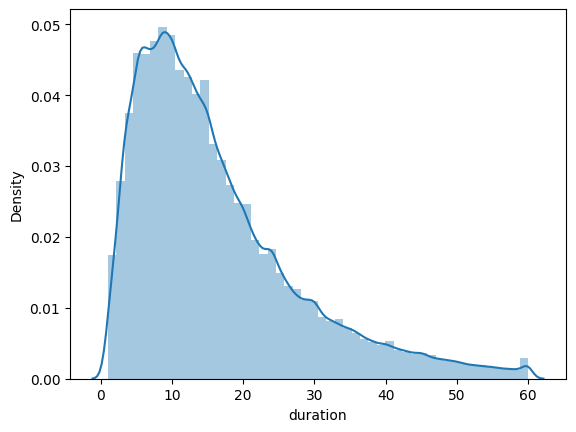

In [183]:
sns.distplot(df['duration'], kde=True, norm_hist=False)

In [184]:
is_null_pickup = pd.isnull(df['PUlocationID'])
is_null_dropoff = pd.isnull(df['DOlocationID'])

In [185]:
df[is_null_pickup | is_null_dropoff]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154094,B03202,2021-01-31 23:57:02,2021-02-01 00:14:27,NaN,177.0,None,B03202,17.416667
1154096,B03239,2021-01-31 23:07:00,2021-01-31 23:17:28,NaN,70.0,None,B03239,10.466667
1154097,B03239,2021-01-31 23:27:39,2021-01-31 23:33:38,NaN,82.0,None,B03239,5.983333
1154098,B03239,2021-01-31 23:40:10,2021-01-31 23:52:07,NaN,56.0,None,B03239,11.950000


In [186]:
is_null_pickup_percentage = len(df[is_null_pickup]) / len(df) * 100.0
is_null_pickup_percentage

83.52732770722618

In [187]:
is_null_dropoff_percentage = len(df[is_null_dropoff]) / len(df) * 100.0
is_null_dropoff_percentage

13.327044059158824

# Q3. Missing values
What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.
The fractions of missign values for pickup location ID is **83.5%**.

In [188]:
df['PUlocationID'].fillna(-1, inplace=True)

/Users/hllj/opt/anaconda3/envs/mlops-practice/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [189]:
df['DOlocationID'].fillna(-1, inplace=True)

In [190]:
columns = ['PUlocationID', 'DOlocationID']
target_column = ['duration']

In [202]:
feat_df = df[columns].astype('str')
target_df = df[target_column]

In [203]:
train_dicts = feat_df.to_dict(orient='records')

In [204]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [205]:
X_train.shape

(1109826, 525)

# Q4. One-hot encoding
What's the dimensionality of this matrix? (The number of columns).
We have 525 dimensions of feature matrix.

In [206]:
linear_regression_model = LinearRegression()

In [207]:
y_train = target_df.values

In [210]:
X_train.shape

(1109826, 525)

In [212]:
y_train.shape

(1109826, 1)

In [213]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred = linear_regression_model.predict(X_train)

In [219]:
mse = mean_squared_error(y, y_pred)

In [220]:
rmse = math.sqrt(mse)

In [221]:
rmse

10.528519107213953

# Q5. Training a model

What's the RMSE on train?

Root mean squared error on training dataset is **10.52**.

In [222]:
VAL_DATA_DIR = '../data/fhv_tripdata_2021-02.parquet'

In [223]:
val_df = pd.read_parquet(VAL_DATA_DIR)

In [224]:
val_df['duration'] = (val_df['dropOff_datetime'] - val_df['pickup_datetime']).dt.total_seconds() / 60.

In [225]:
val_df = val_df[(val_df['duration'] >= 1) & (val_df['duration'] <= 60)]

In [226]:
val_df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,NaN,61.0,None,B00037,8.966667
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,NaN,31.0,None,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,NaN,169.0,None,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285,18.050000


In [228]:
val_df['PUlocationID'].fillna(-1, inplace=True)
val_df['DOlocationID'].fillna(-1, inplace=True)

In [229]:
feat_val_df = val_df[columns].astype('str')
target_val_df = val_df[target_column]

In [230]:
val_dicts = feat_val_df.to_dict(orient='records')

In [231]:
X_val = dv.transform(val_dicts)
X_val.shape

(990113, 525)

In [232]:
y_val = target_val_df.values
y_val.shape

(990113, 1)

In [233]:
y_val_pred = linear_regression_model.predict(X_val)

In [234]:
mse = mean_squared_error(y_val, y_val_pred)

In [235]:
rmse = math.sqrt(mse)

In [236]:
rmse

11.014283225612353

# Q6. Evaluating the model

What's the RMSE on validation?

Root mean squared error on validation dataset is 11.01